A lot of people say that Paso Robles is the next Napa, so this study looks at how similar they really are.

In [666]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import math
from scipy.stats import ttest_ind
import pylab
import scipy.stats as stats
from sklearn import datasets, linear_model
%matplotlib inline

Question 1: Does Paso Robles have the focus on Cabernet Sauvignon as Napa does?

In [667]:
napa_acre_df = pd.read_csv('Napa Acres.csv')
slo_acre_df = pd.read_csv('SLO Acres.csv')
napa_acre_df.shape
slo_acre_df.shape
print(napa_acre_df, slo_acre_df)

               Variety    2008 and Earlier  2009  2010  2011  2012  2013  \
0            AGLIANICO                   1     0     0     0     0     0   
1    ALICANTE BOUSCHET                   1     0     0     0     1     0   
2              BARBERA                  10     0     0     0     0     0   
3       CABERNET FRANC                1032    25    36     6     2    13   
4   CABERNET SAUVIGNON               17834   503   209   312   429   270   
5            CARIGNANE                   4     0     0     0     0     0   
6            CARMENERE                   5     0     0     0     0     2   
7             CHARBONO                  46     2     0     0     0     0   
8              CINSAUT                   1     0     0     0     0     0   
9             COUNOISE                   0     0     0     0     0     0   
10            DOLCETTO                   7     0     0     0     0     0   
11       GAMAY  (NAPA)                  21     0     0     0     0     0   
12          

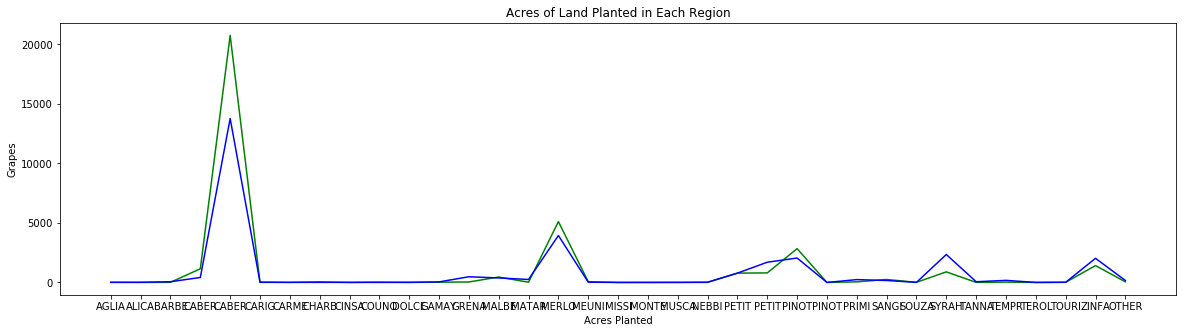

In [668]:
plt.figure(figsize=(20, 5))
plt.plot(napa_acre_df['Total'], color = 'green')
plt.plot(slo_acre_df['Total'], color = 'blue')
keys = [x[0:5] for x in napa_acre_df['Variety']]
x_pos = np.arange(len(keys))
plt.xticks(x_pos, keys)
plt.ylabel('Grapes')
plt.xlabel('Acres Planted')
plt.title('Acres of Land Planted in Each Region')

plt.show()

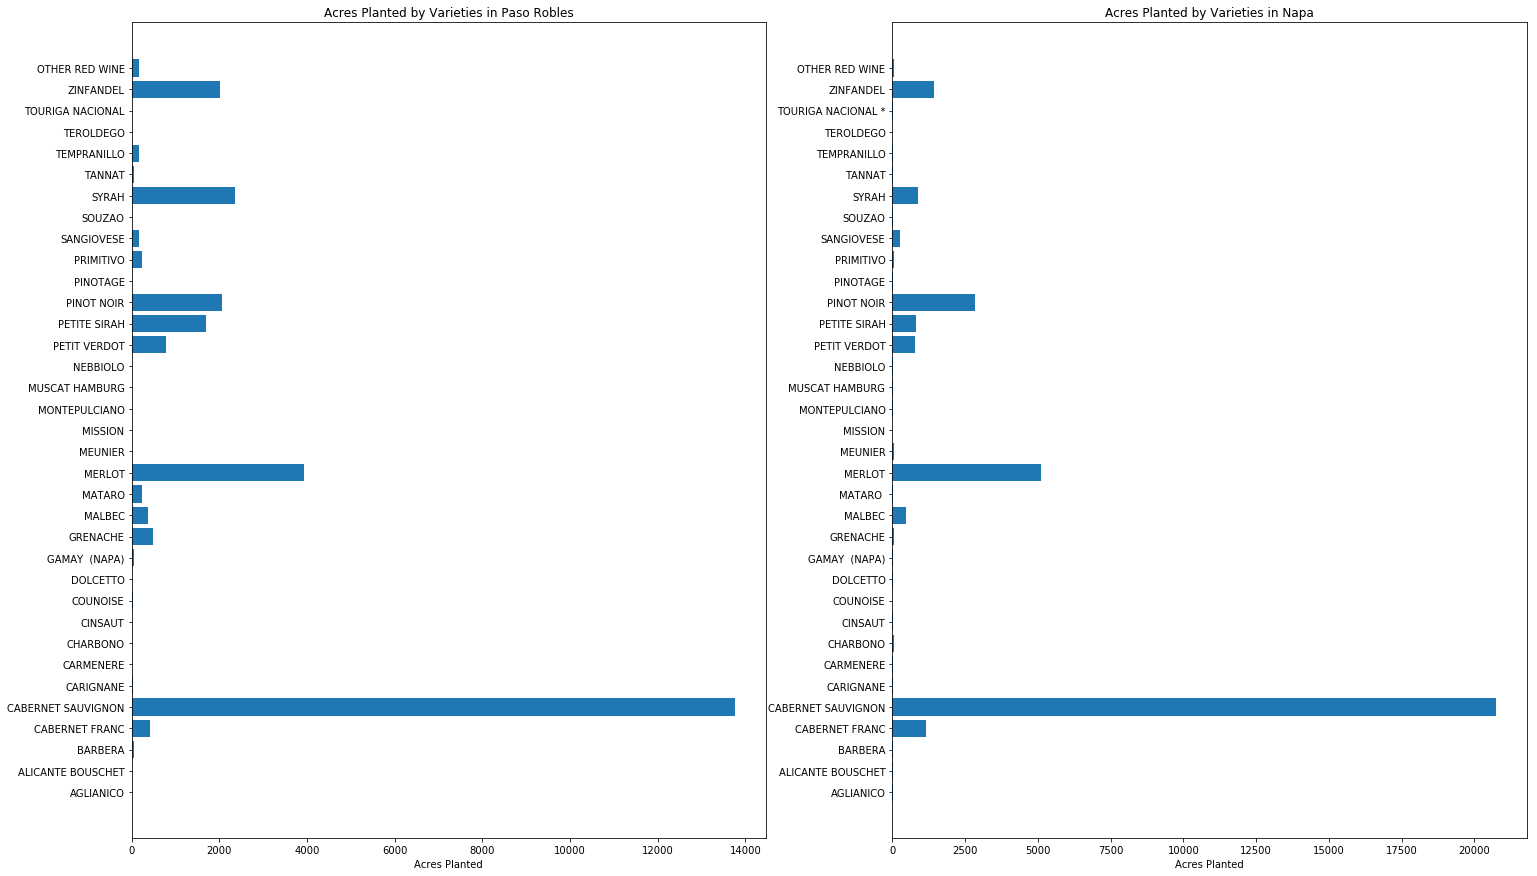

In [669]:
plt.figure(figsize=(25, 15))
plt.subplot(1, 2, 1)
grapes = slo_acre_df['Variety']
acres = slo_acre_df['Total']
acres2 = napa_acre_df['Total']
xs = [i + 0.5 for i, _ in enumerate(grapes)]
plt.barh(xs, acres)
plt.xlabel('Acres Planted')
plt.title('Acres Planted by Varieties in Paso Robles')
plt.yticks([i + 0.5 for i, _ in enumerate(grapes)], grapes)

plt.subplot(1, 2, 2)
grapes = napa_acre_df['Variety']
acres2 = napa_acre_df['Total']
xs = [i + 0.5 for i, _ in enumerate(grapes)]
plt.barh(xs, acres2)
plt.xlabel('Acres Planted')
plt.title('Acres Planted by Varieties in Napa')
plt.yticks([i + 0.5 for i, _ in enumerate(grapes)], grapes)
plt.show()

This bar graph shows that both grow similar varieties of grapes with a real emphasis on Cabernet Sauvignon.

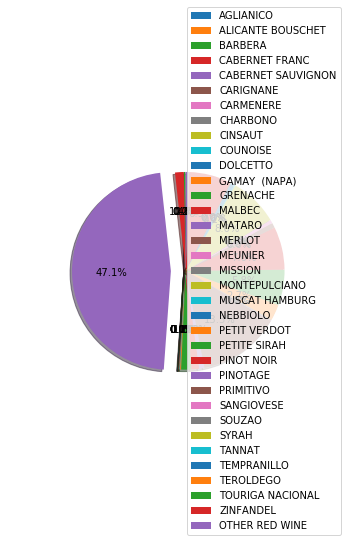

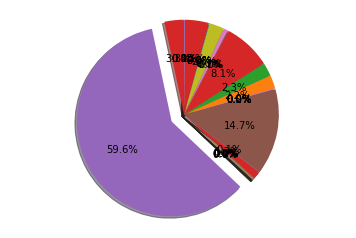

In [670]:
plt.figure(0)
labels = slo_acre_df['Variety']
sizes = slo_acre_df['Total']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=(0, 0, 0, 0, 0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.legend(labels, loc='right')

plt.figure(1)
labels = napa_acre_df['Variety']
sizes = napa_acre_df['Total']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=(0, 0, 0, 0, 0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

The pie graphs with Cabernet sticking out make it even easier to see that nearly half or more of the acres of land devoted to red wine grow Cabernet Sauvignon grapes in both regions.

Ttest_indResult(statistic=0.42590675853750448, pvalue=0.67167280245090066)


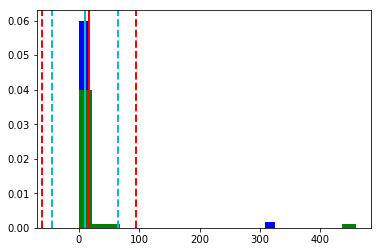

In [671]:
napa = napa_acre_df['2016']
paso = slo_acre_df['2016']
plt.hist(napa, normed=True, bins=20, color='b', label='Napa')
plt.hist(paso, normed=True, bins=20, color='g', label='Paso Robles')
plt.axvline(napa.mean(), color='c', linestyle='solid', linewidth=2)
plt.axvline(napa.mean() + napa.std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(napa.mean() - napa.std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(paso.mean(), color='red', linestyle='solid', linewidth=2)
plt.axvline(paso.mean() + paso.std(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(paso.mean() - paso.std(), color='red', linestyle='dashed', linewidth=2)
print(ttest_ind(paso, napa, equal_var=False))
plt.show()

Plotting them in a histogram, you can see their distributions are very similar with a ttest score of less than 1 with a p value also less than 1 meaning the low variation is a reliable number.

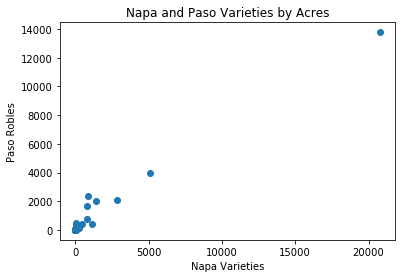

In [672]:
plt.scatter(x = napa_acre_df['Total'], y = slo_acre_df['Total'])
plt.xlabel('Napa Varieties')
plt.ylabel('Paso Robles')
plt.title('Napa and Paso Varieties by Acres')

plt.show()

When plotted against each other in a scatter plot, they again closely align to the line x = y showing that they both have an emphasis on Cabernet Sauvignon grapes.

Question 2: Does the market value land in Paso Robles the same as it prices land in Napa Valley?

In [673]:
land_df = pd.read_csv('Land Prices.csv')
land_df.shape
print(land_df)

    Unnamed: 0  Napa Prime Low  Napa Prime High  Napa Secondary Low  \
0         2003             NaN           180000                 NaN   
1         2004             NaN           180000                 NaN   
2         2005             NaN           200000                 NaN   
3         2006             NaN           275000                 NaN   
4         2007        225000.0           285000            130000.0   
5         2008        225000.0           300000            115000.0   
6         2009        225000.0           300000            115000.0   
7         2010        225000.0           300000            100000.0   
8         2011        225000.0           300000             90000.0   
9         2012        200000.0           300000            100000.0   
10        2013        200000.0           300000            100000.0   
11        2014        220000.0           320000            100000.0   
12        2015        250000.0           370000            120000.0   

    N

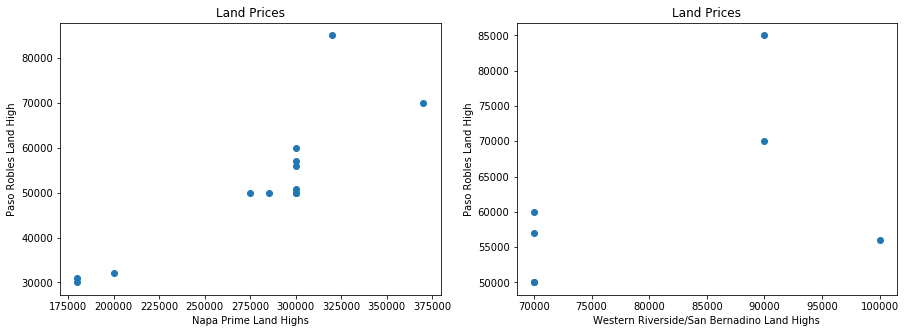

In [674]:
napa_high = land_df['Napa Prime High']
paso_high = land_df['Paso High']
wrsb_high = land_df['wrsb High']

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(x = napa_high, y = paso_high)
plt.xlabel('Napa Prime Land Highs')
plt.ylabel('Paso Robles Land High')
plt.title('Land Prices')

plt.subplot(1, 2, 2)
plt.scatter(x = wrsb_high, y = paso_high)
plt.xlabel('Western Riverside/San Bernadino Land Highs')
plt.ylabel('Paso Robles Land High')
plt.title('Land Prices')

plt.show()

The scatter plots show a tighter relationship between Napa's prime land versus Paso Robles than it does between another wine growing region south of Los Angeles.

Ttest_indResult(statistic=-13.883594876182109, pvalue=1.7350150647847125e-09)


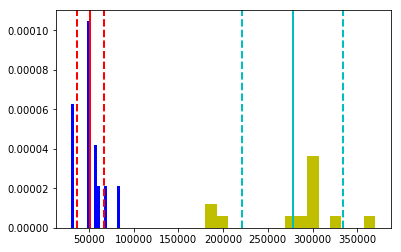

In [675]:
napa = land_df['Napa Prime High']
paso = land_df['Paso High']
plt.hist(napa, normed=True, bins=15, color='y', label='Napa')
plt.hist(paso, normed=True, bins=15, color='b', label='Paso Robles')
plt.axvline(napa.mean(), color='c', linestyle='solid', linewidth=2)
plt.axvline(napa.mean() + napa.std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(napa.mean() - napa.std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(paso.mean(), color='red', linestyle='solid', linewidth=2)
plt.axvline(paso.mean() + paso.std(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(paso.mean() - paso.std(), color='red', linestyle='dashed', linewidth=2)
print(ttest_ind(paso, napa, equal_var=False))
plt.show()

However, plotting them on histograms shows that they are not similar distributions and that they vary too much signaling that observing Paso Robles' land prices in terms of Napa land prices is not a reliable number. The market doesn't look at vineyard space in both regions similarly.

Question 3: Napa Cabernet Sauvignon are some of the most expensive grapes on the market. As the base component in wine, it is important to see if the market values Cabernet Sauvignon grapes the same from both regions. How do they compare?

In [676]:
"""cost_df = pd.read_csv('Cost Per Ton.csv', index_col=0).loc[:,'2000':]"""
cost_df = pd.read_csv('Cost per Ton 2.csv')
cost_df.shape
print(cost_df)

    Year   area 1   area 2   area 3     Napa   area 5   area 6   area 7  \
0   2000  1973.71  1673.17  2417.96  3168.33  1094.04  1306.49  1307.47   
1   2001  2020.11  1722.40  2701.65  3728.56   904.58  1356.09  1252.58   
2   2002  1900.48  1802.72  2694.93  4020.64  1112.31  1361.22  1179.81   
3   2003  1764.95  1689.19  2537.94  4010.85   634.70  1007.42  1152.75   
4   2004  1393.49  1507.51  2397.71  3948.16   701.04   736.05  1083.54   
5   2005  1293.21  1528.53  2322.87  3970.07   762.70   963.01  1000.65   
6   2006  1291.28  1565.19  2265.69  4126.26   578.59   852.09  1008.76   
7   2007  1256.78  1376.33  2237.73  4302.49   703.70  1008.41   927.72   
8   2008  1399.10  1435.31  2321.51  4779.55  1182.27  1136.49   953.38   
9   2009  1340.66  1398.11  2280.67  4772.84  1164.92  1206.63   907.16   
10  2010  1144.39  1287.07  2083.96  4453.09  1178.30  1101.95   848.59   
11  2011  1315.75  1365.78  2111.24  4660.36  1168.33  1283.98   944.25   
12  2012  1589.23  1615.1

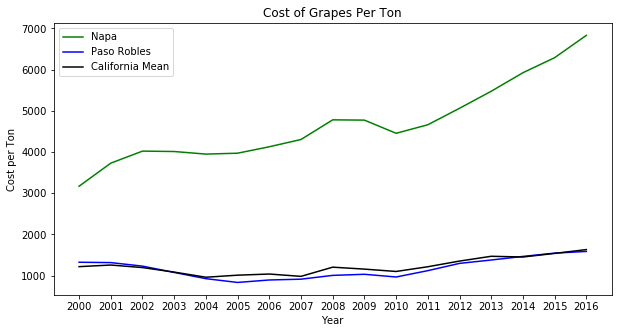

In [677]:
plt.figure(figsize=(10, 5))
plt.plot(cost_df['Napa'], color = 'green')
plt.plot(cost_df['Paso Robles'], color = 'blue')
plt.plot(cost_df['Mean'], label='California Mean', color='black')
dates = Counter(cost_df['Year'])
years = sorted(dates.items(), key=lambda pair: pair[1])
keys = [x[0] for x in years]
x_pos = np.arange(len(keys))
plt.xticks(x_pos, keys)
plt.xlabel('Year')
plt.ylabel('Cost per Ton')
plt.title('Cost of Grapes Per Ton')
plt.legend(loc='upper left') 

plt.show()

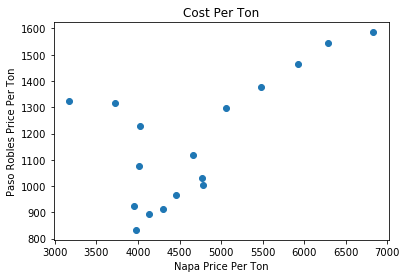

In [678]:
plt.scatter(x = cost_df['Napa'], y = cost_df['Paso Robles'])
plt.xlabel('Napa Price Per Ton')
plt.ylabel('Paso Robles Price Per Ton')
plt.title('Cost Per Ton')

plt.show()

Putting them on a scatter plot shows against each other shows there is no real correlation between the prices for the two regions in any given year.

Ttest_indResult(statistic=14.421161618203746, pvalue=2.6066926074479872e-11)


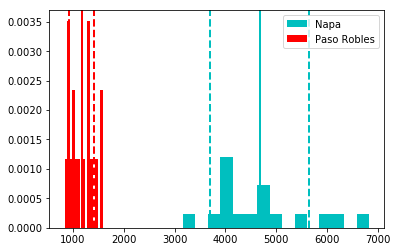

In [679]:
Napa = cost_df['Napa']
Paso = cost_df['Paso Robles']
plt.hist(Napa, normed=True, bins=15, color='c', label='Napa')
plt.hist(Paso, normed=True, bins=15, color='r', label='Paso Robles')
plt.axvline(Napa.mean(), color='c', linestyle='solid', linewidth=2)
plt.axvline(Napa.mean() + Napa.std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(Napa.mean() - Napa.std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(Paso.mean(), color='red', linestyle='solid', linewidth=2)
plt.axvline(Paso.mean() + Paso.std(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(Paso.mean() - Paso.std(), color='red', linestyle='dashed', linewidth=2)
plt.legend(loc='upper right') 
print(ttest_ind(Napa, Paso, equal_var=False))
plt.show()

While plotting their values on histograms shows that they are not similarly distributed meaning they are valued independently of each other.

Ttest_indResult(statistic=0.74078594977525869, pvalue=0.46439736828741729)


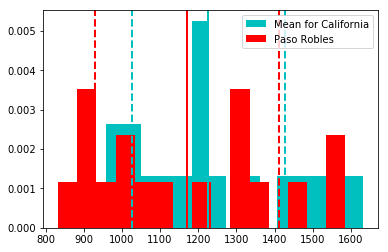

In [680]:
winemean = cost_df['Mean']
Paso = cost_df['Paso Robles']
plt.hist(winemean, normed=True, bins=15, color='c', label='Mean for California')
plt.hist(Paso, normed=True, bins=15, color='r', label='Paso Robles')
plt.axvline(winemean.mean(), color='c', linestyle='solid', linewidth=2)
plt.axvline(winemean.mean() + winemean.std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(winemean.mean() - winemean.std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(Paso.mean(), color='red', linestyle='solid', linewidth=2)
plt.axvline(Paso.mean() + Paso.std(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(Paso.mean() - Paso.std(), color='red', linestyle='dashed', linewidth=2)
plt.legend(loc='upper right') 
print(ttest_ind(mean, Paso, equal_var=False))
plt.show()

Again, plotting them on a histogram against the mean for the state of California (including Napa) shows that the market values grapes from Paso similar to how they price the grapes from the entire state.

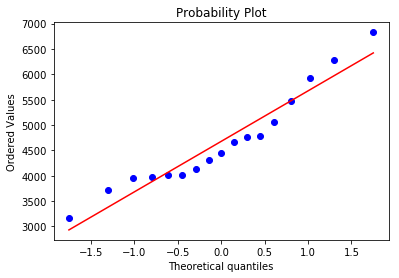

In [681]:
stats.probplot(Napa, dist="norm", plot=pylab)
pylab.show()

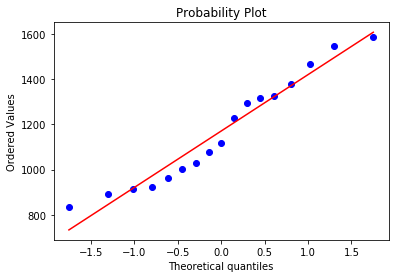

In [682]:
stats.probplot(Paso, dist="norm", plot=pylab)
pylab.show()